In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from lib.utils import *
from utils import *
from lib.RFacade import RFacade
from lib.plot_utils import *
from lib.Plots.CirclesHeatmap import CirclesHeatmap
%matplotlib inline

import pandas..
importing path functions...
importing stat functions...
ipdb is not installed and cannot be imported...
importing misc functions..
importing done...


/g/scb2/zaugg/rio/miniconda2/envs/mypython3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


importing plot functions...


In [3]:
res = get_h2_results(overwrite=True, queries={'mouse', 'human1', 'human2', 'human1_and_human2'})

reading mouse
reading from /g/scb2/zaugg/rio/EclipseProjects/zaugglab/noh_collaboration/data/ldsc_mouse/10000_0.20
reading human1
reading from /g/scb2/zaugg/rio/EclipseProjects/zaugglab/noh_collaboration/data/ldsc_human1_alone_n500/10000
reading human2
reading from /g/scb2/zaugg/rio/EclipseProjects/zaugglab/noh_collaboration/data/ldsc_human2_alone_n500/10000
reading human1_and_human2
reading from /g/scb2/zaugg/rio/EclipseProjects/zaugglab/noh_collaboration/data/ldsc_human1_and_human2_alone_n500/10000
dataframe saved at...
../../../data/h2_by_species_human_two_batches.tsv.gz
/g/scb2/zaugg/rio/EclipseProjects/zaugglab/noh_collaboration/data/h2_by_species_human_two_batches.tsv.gz


/g/scb2/zaugg/rio/miniconda2/envs/mypython3/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
res = res[res['peak.length'] == 10000]

In [7]:
res['species'].value_counts()

mouse                1485
human1                765
human1_and_human2     765
human2                760
Name: species, dtype: int64

In [8]:
res['p.adj']

0       0.000005
1       0.000005
2       0.000005
3       0.000005
4       0.000005
          ...   
3770    1.000000
3771    1.000000
3772    1.000000
3773    1.000000
3774    1.000000
Name: p.adj, Length: 3775, dtype: float64

In [9]:
res['p.adj.altogether'] = RFacade.get_bh_pvalues(res['Coefficient_P_value'])
# res['p.adj.altogether'] = RFacade.get_bh_pvalues(res['Coefficient_P_value'])

In [10]:
res.shape

(3775, 17)

In [11]:
res.groupby(['species', 'p.adj.thr']).size()

species            p.adj.thr
human1             0.2           765
human1_and_human2  0.2           765
human2             0.2           760
mouse              0.2          1485
dtype: int64

In [12]:
res['p.adj.thr'].value_counts()

0.2    3775
Name: p.adj.thr, dtype: int64

In [19]:
res = res[res['p.adj.thr'] == .2]
res.shape

(3780, 17)

In [20]:
res.groupby(['species', 'Name']).size()

species  Name           
human1   all_annotations    45
         bdnf_1h_DA         45
         bdnf_1h_all        45
         bdnf_1h_closed     45
         bdnf_1h_gained     45
                            ..
mouse    kcl_1h_gained      45
         kcl_6h_DA          45
         kcl_6h_all         45
         kcl_6h_closed      45
         kcl_6h_gained      45
Length: 84, dtype: int64

In [21]:
res['filename'].value_counts()
# res[(res['species'] == 'human')]['Name'].value_counts()

frq_Neurot-Nagel                  84
PASS_Neuroticism                  84
PASS_Rheumatoid_Arthritis         84
PASS_Crohns_Disease               84
Intelligence-2018                 84
PASS_Years_of_Education2          84
munged_SZvsBD                     84
frq_Height-GIANT                  84
PASS_Schizophrenia                84
PASS_Autism                       84
PASS_LDL                          84
BMI-GIANT-2015                    84
Epilepsy_All                      84
PASS_Lupus                        84
PASS_Primary_biliary_cirrhosis    84
Neurot-Nagel                      84
MDD-2018                          84
PASS_Celiac                       84
insomnia-2018                     84
PASS_Anorexia                     84
PASS_IBD                          84
ADHD_PGC                          84
PASS_Type_2_Diabetes              84
PASS_HDL                          84
final.frq_SZ-CLOZUK               84
munged_BDvsCONT                   84
PASS_Alzheimer                    84
P

In [22]:
color_by_sp = {'mouse': 'Greens', 'human': 'Purples'}
rcParams['figure.dpi'] = 150
rcParams['figure.figsize'] = [20, 5]

### The following script has to be run twice. The first time to get the common associations, and the second one to label those in the respective heatmap

In [23]:
rows_order = DataFrameAnalyzer.read_tsv('../../../data/ldsc_ontologies_order.tsv', header=None)

In [24]:
from lib.RFacade import RFacade
res = res[~res['Name'].str.lower().str.contains('forskolin')]

In [25]:
res['peak.length'].value_counts()

10000    3420
Name: peak.length, dtype: int64

In [26]:
# We are now correcting the p-values by sample, so favorable in human
# res['p.adj'] = RFacade.get_bh_pvalues(res['Coefficient_P_value'])

In [102]:
res[res['species'] == 'human1'].sort_values('Coefficient_P_value').head(50)

Name   Coefficient  Coefficient_std_error  Coefficient_P_value                  filename     p.adj  peak.length  p.adj.thr species  n.peaks          k  minus.log10.p.adj         coeff     coeff.abs  coeff.abs.log                                        k2  p.adj.altogether  minus.log10.p.val
1587   bdnf_1h_closed  4.509140e-08           8.081424e-09         1.205121e-08  PASS_Years_of_Education1  0.000001        10000        0.2  human1      500  10000_0.2           5.832839  4.509140e-08  4.509140e-08      -7.345906   bdnf_1h_closed_PASS_Years_of_Education1          0.000001           5.832839
1859   bdnf_6h_gained  9.917469e-07           2.362012e-07         1.342034e-05             munged_SZvsBD  0.000512        10000        0.2  human1      500  10000_0.2           3.290380  9.917469e-07  9.917469e-07      -6.003599              bdnf_6h_gained_munged_SZvsBD          0.000512           3.290380
1570   bdnf_6h_gained  1.571145e-06           4.320510e-07         1.381949e-04     PASS_Bipolar_Disorder  0.004582        10000        0.2  human1      500  10000_0.2           2.338921  1.571145e-06  1.571145e-06      -5.803784      bdnf_6h_gained_PASS_Bipolar_Disorder          0.004582           2.338921
1897      bdnf_6h_all  5.667271e-09           1.789690e-09         7.711036e-04         Intelligence-2018  0.022595        10000        0.2  human1      500  10000_0.2           1.645985  5.667271e-09  5.667271e-09      -8.246626             bdnf_6h_all_Intelligence-2018          0.022595           1.645985
1895       kcl_1h_all  5.667271e-09           1.789690e-09         7.711036e-04         Intelligence-2018  0.022595        10000        0.2  human1      500  10000_0.2           1.645985  5.667271e-09  5.667271e-09      -8.246626              kcl_1h_all_Intelligence-2018          0.022595           1.645985
1894      bdnf_1h_all  5.667271e-09           1.789690e-09         7.711036e-04         Intelligence-2018  0.022595        10000        0.2  human1      500  10000_0.2           1.645985  5.667271e-09  5.667271e-09      -8.246626             bdnf_1h_all_Intelligence-2018          0.022595           1.645985
1893  all_annotations  5.667271e-09           1.789690e-09         7.711036e-04         Intelligence-2018  0.022595        10000        0.2  human1      500  10000_0.2           1.645985  5.667271e-09  5.667271e-09      -8.246626         all_annotations_Intelligence-2018          0.022595           1.645985
1896       kcl_6h_all  5.667271e-09           1.789690e-09         7.711036e-04         Intelligence-2018  0.022595        10000        0.2  human1      500  10000_0.2           1.645985  5.667271e-09  5.667271e-09      -8.246626              kcl_6h_all_Intelligence-2018          0.022595           1.645985
1898        kcl_6h_DA  4.783233e-08           1.573450e-08         1.183027e-03         Intelligence-2018  0.034399        10000        0.2  human1      500  10000_0.2           1.463457  4.783233e-08  4.783233e-08      -7.320278               kcl_6h_DA_Intelligence-2018          0.034399           1.463457
2233   bdnf_6h_gained  1.213729e-07           4.058648e-08         1.392718e-03              Neurot-Nagel  0.040187        10000        0.2  human1      500  10000_0.2           1.395916  1.213729e-07  1.213729e-07      -6.915878               bdnf_6h_gained_Neurot-Nagel          0.040187           1.395916
1899    kcl_6h_closed  7.954114e-08           2.669027e-08         1.440510e-03         Intelligence-2018  0.041251        10000        0.2  human1      500  10000_0.2           1.384566  7.954114e-08  7.954114e-08      -7.099408           kcl_6h_closed_Intelligence-2018          0.041251           1.384566
2131   bdnf_6h_gained  1.208152e-07           4.155829e-08         1.823831e-03          frq_Neurot-Nagel  0.049243        10000        0.2  human1      500  10000_0.2           1.307652  1.208152e-07  1.208152e-07      -6.917879           bdnf_6h_gained_frq_Neurot-Nagel          0.049243           1.307652


In [148]:
res['minus.log10.p.adj'] = -np.log10(res['p.adj'])
res['minus.log10.p.val'] = -np.log10(res['Coefficient_P_value'])



In [105]:
!head ../../../data/ldsc_ontologies_order.tsv

munged_BDSCZvsCONT	BDSCZvsCONT
munged_BDvsCONT	BDvsCONT
munged_SZvsBD	SZvsBD
munged_SZvsCONT	SZvsCONT
PASS_Schizophrenia	SZ
frq_Neurot-Nagel	frq_Neuroticism
Neurot-Nagel	Neuroticim
final.frq_SZ-CLOZUK	SZ-CLOZUK
PASS_Bipolar_Disorder	BD
MDD-2018	MDD


In [151]:
query_extend = None
res_sig = []
rows_order = DataFrameAnalyzer.read_tsv('../../../data/ldsc_ontologies_order.tsv', header=None)
k_by_name = DataFrameAnalyzer.get_dict(rows_order, 0, 1)
rows_order = rows_order[0]
min_max_by_sp = {}
sig_pval_mouse_by_k = {}
data_by_sp = {}
for sp in ['mouse', 'human1', 'human2', 'human1_and_human2']: # res.groupby('species'):
    grp1 = res[res['species'] == sp]
    pdf_paths = []
    for k, grp in grp1.groupby("k"):
        
        if query_extend is not None and k != '%s_0.2' % query_extend:
            continue
        # print(k, grp.shape[0])
        heatmap_grid = [2, 8, 0, 0, 2, 1]  # grid spec, rowi, coli, rowspan, colspan
        colorbar_grid = [4, 4, 2, 2, 1, 1]  # grid spec, rowi, coli, rowspan, colspan
        circle_legend_bbox = [2.0, 0.85]

        grp['coeff.norm01'] = DataFrameAnalyzer.norm_01(np.abs(grp['Coefficient']))
        # sig_pval = grp.pivot('filename', 'Name', 'minus.log10.p.adj')
        sig_pval = grp.pivot('filename', 'Name', 'minus.log10.p.val')
        sig_padj = grp.pivot('filename', 'Name', 'minus.log10.p.adj')
        sig_coeff = grp.pivot('filename', 'Name', 'Coefficient')

        order_cols = [c + "_" + time + "_" + group
                      for group in ['DA', 'gained', 'closed', 'all']
                      for c in ['bdnf', 'kcl', 'forskolin']
                      for time in ['1h', '6h']]
        order_cols = [oi for oi in order_cols if (not 'forskolin' in oi)]
        order_cols = [oi for oi in order_cols if not 'all' in oi] + ['all_annotations']

        sig_pval = sig_pval[[c for c in order_cols if c in sig_pval]]
        sig_padj = sig_padj[[c for c in order_cols if c in sig_padj]]

        sig_pval = pd.DataFrame(np.where(sig_pval < 0, 0, sig_pval), index=sig_pval.index, columns=sig_pval.columns)
        sig_padj = pd.DataFrame(np.where(sig_padj < 0, 0, sig_padj), index=sig_padj.index, columns=sig_padj.columns)
        sig_coeff = sig_coeff[[c for c in order_cols if c in sig_coeff]]

        # force order in ontologies
        sig_pval = sig_pval.reindex(rows_order)
        sig_padj = sig_padj.reindex(rows_order)
        sig_coeff = sig_coeff.reindex(rows_order)

        sig_pval.index = sig_pval.index.to_series().map(k_by_name)
        sig_padj.index = sig_padj.index.to_series().map(k_by_name)
        sig_coeff.index = sig_coeff.index.to_series().map(k_by_name)

        # after ordering, keep the output in a way that can be parsed
        # sig_pval.index = [idx.replace("munged_", "").replace("PASS_", "") for idx in sig_pval.index]
        # sig_coeff.index = [idx.replace("munged_", "").replace("PASS_", "") for idx in sig_coeff.index]

        sig_pval = sig_pval.rename(columns={'forskolin_6h_all': 'all'})
        sig_padj = sig_padj.rename(columns={'forskolin_6h_all': 'all'})
        sig_coeff = sig_coeff.rename(columns={'forskolin_6h_all': 'all'})

        for c in sig_coeff:
            break
            k_tmp = c + ".abs"
            sig_coeff[k_tmp] = sig_coeff[c].abs()
            k_tmp_log = c + ".abs.log"
            sig_coeff[k_tmp_log] = np.log10(sig_coeff[k_tmp])
            k_tmp_range = c + ".abs.log"
            # sig_coeff[k_tmp_range] = np.where(
            # print(sig_coeff[[c, k_tmp, k_tmp_log]].head())
            del sig_coeff[k_tmp]
            del sig_coeff[k_tmp_log]

        max_coeff = max(np.max(sig_coeff.abs()))
        min_coeff = min(np.min(sig_coeff.abs()))

        if sp == 'mouse':
            min_max_by_sp[sp] = [min_coeff, max_coeff]
        else:
            min_coeff, max_coeff = min_max_by_sp['mouse']

        # print(sp, min_coeff, max_coeff)
        tickscolorbar = [-10 ** (int(np.log10(max_coeff) - 1) - i * 2) for i in range(4)][::-1]
        tickscolorbar = tickscolorbar + [-ti for ti in tickscolorbar][::-1]

        if sp == 'mouse':
            sig_pval_mouse_by_k[k] = sig_pval
        if sp == 'human':
            
            for padj_thr in [0.01, 0.05, 0.1, 0.15, 0.2]:
                hm = sig_pval_mouse_by_k[k]
                minus_log_pval = -np.log10(padj_thr)
                n_sig_mouse =  (hm.head(19) > minus_log_pval).sum().sum()
                n_sig_human =  (sig_pval > minus_log_pval).head(19).sum().sum()

                n_sig_mouse_neg =  (hm.tail(hm.shape[0] - 19) > minus_log_pval).sum().sum()
                n_sig_human_neg =  (sig_pval > minus_log_pval).tail(hm.shape[0] - 19).sum().sum()

                # print(k, 'mouse sig', (sig_pval_mouse_by_k[k].head(19) > 1.0).sum().sum())
                # print(k, 'human sig', (sig_pval > 1.0).head(19).sum().sum())
                # stop()

                res_sig.append([k, padj_thr, n_sig_mouse, n_sig_human, n_sig_mouse_neg, n_sig_human_neg])
                # print(res_sig[-1])

        data_by_sp[k + '_' + sp] =  sig_coeff, sig_pval, sig_padj, max_coeff

res_sig = pd.DataFrame(res_sig, columns=['k', 'p.adj.thr', 'n.mouse.neuronal', 'n.human.neuronal', 'n.mouse.neg', 'n.human.neg'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:21]


In [107]:
sig = res_sig[res_sig['p.adj.thr'] == .2]
sig

Empty DataFrame
Columns: [k, p.adj.thr, n.mouse.neuronal, n.human.neuronal, n.mouse.neg, n.human.neg]
Index: []

In [108]:
if False:
    sig['bp'] = sig['k'].str.split('_').str[0]
    sig['p.adj'] = sig['k'].str.split('_').str[1]
    rcParams['figure.figsize'] = 6, 3
    plt.subplot(2, 2, 1)

    sig['bp'] = sig['bp'].astype(int)
    m = sig.pivot('bp', 'p.adj', 'n.mouse.neuronal')
    sns.heatmap(m, cmap='Reds', fmt='.0f', annot=m)
    plt.yticks(rotation=0)
    plt.title('mouse # assoc. neuronal')

    plt.subplot(2, 2, 2)
    h = sig.pivot('bp', 'p.adj', 'n.human.neuronal')
    sns.heatmap(h, cmap='Reds', fmt='.0f', annot=h)
    plt.yticks(rotation=0)
    plt.title('human # assoc. neuronal')

    plt.subplot(2, 2, 3)
    h = sig.pivot('bp', 'p.adj', 'n.mouse.neg')
    sns.heatmap(h, cmap='Greens', fmt='.0f', annot=h)
    plt.yticks(rotation=0)
    plt.title('mouse # assoc. non-neuronal')

    plt.subplot(2, 2, 4)
    h = sig.pivot('bp', 'p.adj', 'n.human.neg')
    sns.heatmap(h, cmap='Greens', fmt='.0f', annot=h)
    plt.yticks(rotation=0)
    plt.title('human # assoc. non-neuronal')

    plt.tight_layout()

In [109]:
# res[res['filename'] == 'frq_Neurot-Nagel'] # ['filename'].value_counts()

In [110]:
# res[(res['k'] == '5000_0.15') & (res['species'] == 'human') & (res['Name'] == 'bdnf_1h_gained')].sort_values('p.adj').head(50)
# res[(res['species'] == 'human') & (res['Name'] == 'bdnf_1h_gained')].sort_values('p.adj').head(50)

In [111]:
data_by_sp.keys()

dict_keys(['10000_0.2_mouse', '10000_0.2_human1', '10000_0.2_human2', '10000_0.2_human1_and_human2'])

In [112]:
from sklearn.utils import shuffle

query_extend = '10000'
mouse_sig = data_by_sp['%s_0.2' % query_extend + ("_mouse")][1]
human1_sig = data_by_sp['%s_0.2' % query_extend + ("_human1")][1]
human2_sig = data_by_sp['%s_0.2' % query_extend + ("_human2")][1]

human1_sig.head()

Name         bdnf_1h_DA  bdnf_6h_DA  kcl_1h_DA  kcl_6h_DA  bdnf_1h_gained  bdnf_6h_gained  kcl_1h_gained  kcl_6h_gained  bdnf_1h_closed  bdnf_6h_closed  kcl_1h_closed  kcl_6h_closed  all_annotations
0                                                                                                                                                                                                     
BDSCZvsCONT    0.000189    1.760398   0.194024   0.541016        0.019442        1.469542       0.366878       0.677130        0.013530        0.956581       0.024631       0.348932         0.498726
BDvsCONT       0.168809    1.171076   0.117075   0.417748        0.014557        1.950966       0.681332       1.004156        0.278690        0.241968       0.047242       0.096532         1.082216
SZvsBD         0.236865    1.850035   0.083639   0.327341        0.357296        4.872237       0.033096       0.855129        0.265711        0.075417       0.268380       0.017681         0.578128
SZvsCONT       0.000005    1.143969   0.301284   0.268751        0.021223        0.853224       0.174381       0.316209        0.000067        0.840731       0.491837       0.283378         0.204186
SZ             0.027415    1.818833   0.389868   0.405552        0.010542        1.665918       0.210886       0.489590        0.079930        0.885700       0.529573       0.338896         0.496788

In [113]:
mouse_sig.head()

Name         bdnf_1h_DA  bdnf_6h_DA  kcl_1h_DA  kcl_6h_DA  bdnf_1h_gained  bdnf_6h_gained  kcl_1h_gained  kcl_6h_gained  bdnf_1h_closed  bdnf_6h_closed  kcl_1h_closed  kcl_6h_closed  all_annotations
0                                                                                                                                                                                                     
BDSCZvsCONT    2.168640    1.152737   1.511314   0.285973        1.931861        1.318675       1.117359       0.165388        0.727946        0.270372       1.101105       0.458803         7.310729
BDvsCONT       1.493438    1.129932   0.877559   0.569764        1.190422        1.420399       0.996326       0.429190        0.810897        0.292567       0.441628       0.517787         5.249733
SZvsBD         0.616627    0.417853   1.264549   0.511317        0.304611        0.292539       1.143339       0.456480        1.081425        0.646727       0.598787       0.405646         1.578881
SZvsCONT       2.013443    1.626717   1.033952   0.131273        1.682089        1.284414       0.569608       0.121527        0.752358        0.874427       1.024585       0.219581         6.489172
SZ             2.472110    1.452377   1.138358   0.372571        2.092349        1.520112       0.742477       0.140635        0.779871        0.416835       0.998524       0.706262         6.773192

In [114]:
human1_sig.head()

Name         bdnf_1h_DA  bdnf_6h_DA  kcl_1h_DA  kcl_6h_DA  bdnf_1h_gained  bdnf_6h_gained  kcl_1h_gained  kcl_6h_gained  bdnf_1h_closed  bdnf_6h_closed  kcl_1h_closed  kcl_6h_closed  all_annotations
0                                                                                                                                                                                                     
BDSCZvsCONT    0.000189    1.760398   0.194024   0.541016        0.019442        1.469542       0.366878       0.677130        0.013530        0.956581       0.024631       0.348932         0.498726
BDvsCONT       0.168809    1.171076   0.117075   0.417748        0.014557        1.950966       0.681332       1.004156        0.278690        0.241968       0.047242       0.096532         1.082216
SZvsBD         0.236865    1.850035   0.083639   0.327341        0.357296        4.872237       0.033096       0.855129        0.265711        0.075417       0.268380       0.017681         0.578128
SZvsCONT       0.000005    1.143969   0.301284   0.268751        0.021223        0.853224       0.174381       0.316209        0.000067        0.840731       0.491837       0.283378         0.204186
SZ             0.027415    1.818833   0.389868   0.405552        0.010542        1.665918       0.210886       0.489590        0.079930        0.885700       0.529573       0.338896         0.496788

In [115]:
human2_sig.head()

Name         bdnf_1h_DA  bdnf_6h_DA  kcl_1h_DA  kcl_6h_DA  bdnf_1h_gained  bdnf_6h_gained  kcl_1h_gained  kcl_6h_gained  bdnf_1h_closed  bdnf_6h_closed  kcl_1h_closed  kcl_6h_closed  all_annotations
0                                                                                                                                                                                                     
BDSCZvsCONT    0.526976    0.563523   2.027919   0.739038        0.608327        0.647343       0.859216       0.297520        0.364543        0.316773       0.911327       1.061986         0.750411
BDvsCONT       1.032341    0.536218   0.793339   0.713461        0.364794        0.680023       0.551239       0.473788        1.521489        0.491582       0.651834       0.715589         1.115879
SZvsBD         0.444380    0.163269   0.438692   0.605800        0.358733        0.408422       0.238750       0.812586        0.454506        0.013566       0.509350       0.231131         0.886030
SZvsCONT       0.130897    0.272435   0.438286   0.653134        0.561879        0.678962       0.389072       0.395843        0.121205        0.009513       0.403399       0.740354         0.316823
SZ             0.180077    0.098470   0.202742   0.760053        0.340179        0.277766       0.308003       0.494826        0.187047        0.018692       0.183053       0.732825         0.808586

In [210]:
mouse_sig.shape, human1_sig.shape, human2_sig.shape

((45, 13), (45, 13), (45, 13))

In [232]:
query_extend = '10000'
mouse_sig = data_by_sp['%s_0.2' % query_extend + ("_mouse")][1]
human1_sig = data_by_sp['%s_0.2' % query_extend + ("_human1")][1]
human2_sig = data_by_sp['%s_0.2' % query_extend + ("_human2")][1]

pval_thr = -np.log(0.1)

only_bdnf = True

if only_bdnf:
    sig_both = np.where(np.logical_and(mouse_sig[[c for c in mouse_sig if 'bdnf' in c]] > pval_thr,
                                       human1_sig[[c for c in human1_sig if 'bdnf' in c]] > pval_thr), 1, 0)
obs = sum((sum(sig_both)))

nperm = []

only_bdnf = True
for i in range(1000):
    mouse_sig_perm = shuffle(mouse_sig[[c for c in mouse_sig if 'bdnf' in c]].copy().sample(frac=1))
    human_sig_perm = shuffle(human1_sig[[c for c in human1_sig if 'bdnf' in c]].copy().sample(frac=1))
    nperm.append(sum(sum(np.where(np.logical_and(mouse_sig_perm > pval_thr, human_sig_perm > pval_thr), 1, 0))))
mu, sigma = np.mean(nperm), np.std(nperm)

zscore = (obs - mu) / sigma
print("Observed associations in matched samples %i: Z=%.2f" % (obs, zscore))
    

Observed associations in matched samples 3: Z=5.64


In [117]:
!mkdir ../../../data/figures/ldsc_assoc

mkdir: cannot create directory ‘../../../data/figures/ldsc_assoc’: File exists


In [118]:
sel = {k_by_name[k] for k in k_by_name}
sel = {s for s in sel if not s in {'T1D', 'UC', 'SWB', 'CAD', 'HDL', 'BMI', 'BMI2', 'Fasting Glucose', 
                                   'BMI1', 'Height-GIANT', 'TG', 'RA', 'CD', 'Height 1', 'Anorexia', 'MS', 'LDL',
                                   'T2D', 'PBC', 'DS', 'IBD' , 'SLE', 'Smoked', 'Celiac'}}

### Where is the term BD coming from?

In [119]:
res[res['filename'].str.contains('BD')]['filename'].value_counts()

munged_BDvsCONT       76
munged_SZvsBD         76
PASS_IBD              76
munged_BDSCZvsCONT    76
Name: filename, dtype: int64

In [120]:
coefs = []
sigs = []
for sp in data_by_sp:

    coef, sig, sig_padj, max_coef = data_by_sp[sp]
    
    coef = coef[coef.index.isin(sel)]
    sig = sig[sig.index.isin(sel)]

    coef.columns = [c + '_%s' % sp for c in coef.columns]
    sig.columns = [c + '_%s' % sp for c in sig.columns]

    coefs.append(coef)
    sigs.append(sig)
    
coefs = pd.concat(coefs, axis=1)
sigs = pd.concat(sigs, axis=1)

### Proposed order for visualization

In [172]:
order_proposed = ['BD',
                'BDvsCONT',
                'BDSCZvsCONT',
                'SZ',
                'SZ-CLOZUK',
                'SZvsBD',
                'SZvsCONT',
                'MDD',
                'Intelligence',
                'Ed. yrs. 1',
                'Ed. yrs. 2',
                'ADHD',
                'Neuroticim',
                'Neuroticism',
                'frq_Neuroticism',
                'Autism',
                'insomnia',
                'Epilepsy',
                'Epilepsy_focal',
                'Epilepty_GGE',
                'AD',
                'AD_h2']

In [173]:
g = sns.clustermap(coefs.fillna(0), annot=np.where(sigs > 1.0, '*', ''), fmt='', method='complete',
                   row_cluster=True, col_cluster=False, yticklabels=True, vmin=-max_coeff, vmax=max_coeff, cmap='Greens')

reordered_row = g.dendrogram_row.reordered_ind
reordered_index = [coefs.index[i] for i in reordered_row]

reordered_index = order_proposed
coefs = coefs.reindex(reordered_index)
sig = sig.reindex()
# den = scipy.cluster.hierarchy.dendrogram(g.dendrogram_col.linkage,
#                                          labels = df.index,
#                                          color_threshold=0.60)  
# plt.subplots_adjust(left=.5, bottom=.6)
plt.subplots_adjust(bottom=0.13, top=0.92, right=0.99, left=.175)
# plt.tight_layout()
plt.subplots_adjust(bottom=0.4, right=.6)
savepdf('../../../data/figures/ldsc_assoc/clustermap_all')
plt.close()


In [130]:
data_by_sp.keys()

dict_keys(['10000_0.2_mouse', '10000_0.2_human1', '10000_0.2_human2', '10000_0.2_human1_and_human2'])

In [131]:
res[(res['species'] == 'human1') & (res['filename'] == 'PASS_Bipolar_Disorder')]

Name   Coefficient  Coefficient_std_error  Coefficient_P_value               filename     p.adj  peak.length  p.adj.thr species  n.peaks          k  minus.log10.p.adj         coeff     coeff.abs  coeff.abs.log                                     k2  p.adj.altogether  minus.log10.p.val
1570   bdnf_6h_gained  1.571145e-06           4.320510e-07             0.000138  PASS_Bipolar_Disorder  0.004582        10000        0.2  human1      500  10000_0.2       2.338921e+00  1.571145e-06  1.571145e-06      -5.803784   bdnf_6h_gained_PASS_Bipolar_Disorder          0.004582           3.859508
1571       bdnf_6h_DA  6.537110e-07           2.615669e-07             0.006224  PASS_Bipolar_Disorder  0.113214        10000        0.2  human1      500  10000_0.2       9.460985e-01  6.537110e-07  6.537110e-07      -6.184614       bdnf_6h_DA_PASS_Bipolar_Disorder          0.113214           2.205965
1572   bdnf_6h_closed  1.949141e-07           3.063232e-07             0.262290  PASS_Bipolar_Disorder  0.860169        10000        0.2  human1      500  10000_0.2       6.541620e-02  1.949141e-07  1.949141e-07      -6.710157   bdnf_6h_closed_PASS_Bipolar_Disorder          0.860169           0.581219
1573    kcl_1h_gained  4.825926e-08           1.732460e-07             0.390292  PASS_Bipolar_Disorder  0.936108        10000        0.2  human1      500  10000_0.2       2.867403e-02  4.825926e-08  4.825926e-08      -7.316419    kcl_1h_gained_PASS_Bipolar_Disorder          0.936108           0.408611
1574    kcl_6h_gained  6.793985e-08           3.022579e-07             0.411077  PASS_Bipolar_Disorder  0.938507        10000        0.2  human1      500  10000_0.2       2.756255e-02  6.793985e-08  6.793985e-08      -7.167875    kcl_6h_gained_PASS_Bipolar_Disorder          0.938507           0.386076
1575      bdnf_1h_all -9.888096e-09           2.824055e-08             0.636883  PASS_Bipolar_Disorder  1.000000        10000        0.2  human1      500  10000_0.2       8.543941e-12 -9.888096e-09  9.888096e-09            NaN      bdnf_1h_all_PASS_Bipolar_Disorder          1.000000           0.195941
1576       kcl_1h_all -9.888096e-09           2.824055e-08             0.636883  PASS_Bipolar_Disorder  1.000000        10000        0.2  human1      500  10000_0.2       8.543941e-12 -9.888096e-09  9.888096e-09            NaN       kcl_1h_all_PASS_Bipolar_Disorder          1.000000           0.195941
1577       kcl_6h_all -9.888096e-09           2.824055e-08             0.636883  PASS_Bipolar_Disorder  1.000000        10000        0.2  human1      500  10000_0.2       8.543941e-12 -9.888096e-09  9.888096e-09            NaN       kcl_6h_all_PASS_Bipolar_Disorder          1.000000           0.195941
1578      bdnf_6h_all -9.888096e-09           2.824055e-08             0.636883  PASS_Bipolar_Disorder  1.000000        10000        0.2  human1      500  10000_0.2       8.543941e-12 -9.888096e-09  9.888096e-09            NaN      bdnf_6h_all_PASS_Bipolar_Disorder          1.000000           0.195941
1579  all_annotations -9.888096e-09           2.824055e-08             0.636883  PASS_Bipolar_Disorder  1.000000        10000        0.2  human1      500  10000_0.2       8.543941e-12 -9.888096e-09  9.888096e-09            NaN  all_annotations_PASS_Bipolar_Disorder          1.000000           0.195941
1580        kcl_1h_DA -4.679354e-08           1.179317e-07             0.654237  PASS_Bipolar_Disorder  1.000000        10000        0.2  human1      500  10000_0.2       8.543941e-12 -4.679354e-08  4.679354e-08            NaN        kcl_1h_DA_PASS_Bipolar_Disorder          1.000000           0.184265
1581    kcl_1h_closed -1.039583e-07           1.888863e-07             0.708969  PASS_Bipolar_Disorder  1.000000        10000        0.2  human1      500  10000_0.2       8.543941e-12 -1.039583e-07  1.039583e-07            NaN    kcl_1h_closed_PASS_Bipolar_Disorder          1.000000           0.149373
1582        kcl_6h_DA -1.358385e-07           1.618196e-07             0.79939

In [142]:
data_by_sp.keys()

dict_keys(['10000_0.2_mouse', '10000_0.2_human1', '10000_0.2_human2', '10000_0.2_human1_and_human2'])

Name             bdnf_1h_DA  bdnf_6h_DA  kcl_1h_DA  kcl_6h_DA  bdnf_1h_gained  bdnf_6h_gained  kcl_1h_gained  kcl_6h_gained  bdnf_1h_closed  bdnf_6h_closed  kcl_1h_closed  kcl_6h_closed  all_annotations
0                                                                                                                                                                                                         
BD                     True        True       True       True            True            True           True           True            True            True           True           True             True
BDvsCONT               True        True       True       True            True            True           True           True            True            True           True           True             True
BDSCZvsCONT            True        True       True       True            True            True           True           True            True            True           True           True             True
SZ                     True        True       True       True            True            True           True           True            True            True           True           True             True
SZ-CLOZUK              True        True       True       True            True            True           True           True            True            True           True           True             True
SZvsBD                 True        True       True       True            True            True           True           True            True            True           True           True             True
SZvsCONT               True        True       True       True            True            True           True           True            True            True           True           True             True
MDD                    True        True       True       True            True            True           True           True            True            True           True           True             True
Intelligence           True        True       True       True            True            True           True           True            True            True           True           True             True
Ed. yrs. 1             True        True       True       True            True            True           True           True            True            True           True           True             True
Ed. yrs. 2             True        True       True       True            True            True           True           True            True            True           True           True             True
ADHD                   True        True       True       True            True            True           True           True            True            True           True           True             True
Neuroticim             True        True       True       True            True            True           True           True            True            True           True           True             True
Neuroticism            True        True       True       True            True            True           True           True            True            True           True           True             True
frq_Neuroticism        True        True       True       True            True            True           True           True            True            True           True           True             True
Autism                 True        True       True       True            True            True           True           True            True            True           True           True             True
insomnia               True        True       True       True            True            True           True           True            True            True           True           True             True
Epilepsy               True        True       True       True            True            True           True           True            True    

In [161]:
sig_coeff, sig_pval, sig_padj, max_coeff = data_by_sp[k]

In [177]:
supplementary_index = pd.Index(reordered_index).append(sig_coeff.index[~sig_coeff.index.isin(reordered_index)])

Index(['BD', 'BDvsCONT', 'BDSCZvsCONT', 'SZ', 'SZ-CLOZUK', 'SZvsBD', 'SZvsCONT', 'MDD', 'Intelligence', 'Ed. yrs. 1', 'Ed. yrs. 2', 'ADHD', 'Neuroticim', 'Neuroticism', 'frq_Neuroticism', 'Autism', 'insomnia', 'Epilepsy', 'Epilepsy_focal', 'Epilepty_GGE', 'AD', 'AD_h2', 'SWB', 'CD', 'IBD', 'SLE', 'Anorexia', 'RA', 'MS', 'BMI1', 'DS', 'BMI2', 'Height-GIANT', 'Height 1', 'Smoked', 'Celiac', 'LDL', 'Fasting Glucose', 'HDL', 'TG', 'T1D', 'T2D', 'PBC', 'UC', 'CAD'], dtype='object')

In [220]:
sum((sig_padj > padj_thr_red_line).sum())

24

In [222]:
reload(lib.Plots.CirclesHeatmap); from lib.Plots.CirclesHeatmap import CirclesHeatmap
pdf_paths = []

reorder_index = True

for subset in [False, True]:
    for k in data_by_sp:
        for padj_thr_red_line in [0.01, 0.05, 0.1, 0.2]:    
            if padj_thr_red_line != 0.1:
                continue
            # if k != '10000_0.2':
            #     continue
            if not '10000_0.2' in k:
                continue
            print(k)
            # if not 'human' in k:
            #     continue
            sig_coeff, sig_pval, sig_padj, max_coeff = data_by_sp[k]
            supplementary_index = pd.Index(reordered_index).append(sig_coeff.index[~sig_coeff.index.isin(reordered_index)])
            
            if subset:
                sig_coeff = sig_coeff.reindex(reordered_index)
                sig_pval = sig_pval.reindex(reordered_index)
                sig_padj = sig_padj.reindex(reordered_index)
                
                sig_coeff = sig_coeff.reindex(columns=np.array(order_cols))
                sig_pval = sig_pval.reindex(columns=np.array(order_cols))
                sig_padj = sig_padj.reindex(columns=np.array(order_cols))
            else:
                sig_coeff = sig_coeff.reindex(supplementary_index)
                sig_pval = sig_pval.reindex(supplementary_index)
                sig_padj = sig_padj.reindex(supplementary_index)
            print(sig_coeff.shape)


            order_cols = [c + "_" + time + "_" + group
                  for group in ['DA', 'gained', 'closed']
                  for c in ['bdnf', 'kcl']
                  for time in ['1h', '6h']] + ['all_annotations']

            # this is at the moment necessary to allow plotting
            sig_coeff = sig_coeff.fillna(np.nanmin(sig_coeff))
            sig_pval = sig_pval.fillna((np.nanmin(sig_pval)))
            sig_padj = sig_padj.fillna((np.nanmin(sig_padj)))

            # mouse_sig = mouse_sig[mouse_sig.index.isin(reordered_index)].reindex(reordered_index)
            # human_sig = human_sig[human_sig.index.isin(reordered_index)].reindex(reordered_index)

            line_widths = pd.DataFrame(np.where(sig_pval > -np.log10(padj_thr_red_line), .8, 0), index=sig_pval.index,
                               columns=sig_pval.columns)
            # edgecolor = pd.DataFrame(np.where(np.logical_or(mouse_sig > 1.0, human_sig > 1.0), 'red', 'black'),
            #                         index=sig_pval.index, columns=sig_pval.columns)
            edgecolor = pd.DataFrame(np.where(sig_padj >  -np.log10(padj_thr_red_line), 'red',
                                              np.where(sig_pval >  -np.log10(padj_thr_red_line), 'orange', 'black')),
                                     index=sig_pval.index, columns=sig_pval.columns)

            line_widths[(edgecolor == 'red')] = .5
            line_widths[(edgecolor=='orange')] = .25
            line_widths[edgecolor == 'black'] = .05

            
            print(k, sum((sig_padj > -np.log10(padj_thr_red_line)).sum()))
            print('\n\n\n')
            
            # print(sig_coeff.shape)
            CirclesHeatmap.make_bubble_heatmap(sig_coeff, sig_pval, vmin=-max_coeff, vmax=max_coeff, quantAmplifier=1.4,
                                               heatmap_grid=heatmap_grid, marker="o", power=1.7,
                                               circle_legend_bbox=circle_legend_bbox, xlab='Time [h]', rotation_xlabs=90,
                                               ha_xlabs='right', h=6, edgecolor=edgecolor,
                                               heatmap_title='Partitioned heritability\n%s\np.val(red_line)= %.2f' % (k, padj_thr_red_line),
                                               palette_id='BrBG',
                                               line_widths=line_widths, xticks_fontsize=8, yticks_fontsize=8,
                                               tickscolorbar=[-1e-6, -1e-8, -1e-10,
                                                              1e-10, 1e-8, 1e-6],
                                               ylab='', circle_legend_ticks=[1, 2, 3, 4, 5],
                                               cbar_label='h2 coefficient', circles_legend_title='-log(Padj)',
                                               title=k, show_posneg_log_scale=True,
                                               colorbar_grid=colorbar_grid, grid=False)
            
            plt.subplots_adjust(bottom=0.13, top=0.92, right=0.99, left=.175)
            # plt.tight_layout()
            if not subset:
                plt.subplots_adjust(bottom=0.05)
            else:
                plt.subplots_adjust(bottom=0.55)                
            savepdf('../../../data/figures/ldsc_assoc/%s_subset_%i_pval_red_line_%.2f_no_integration_all_%i' % (k, subset, padj_thr_red_line, subset), dpi=200)
            plt.close()

            pdf_paths.append('../../../data/figures/ldsc_assoc/%s_subset_%i_pval_red_line_%.2f_no_integration_all_%i.pdf' % (k, subset, padj_thr_red_line, subset))

from lib.PDFParser import PDFParser
PDFParser.concatenate(pdf_paths, '../../../data/figures/ldsc_assoc/all_subset_%i_no_integration.pdf' % (subset))

10000_0.2_mouse
(45, 13)
10000_0.2_mouse 31




before plotting dimensions...
(45, 13)
current columns
('legends', [1, 2, 3, 4, 5])
1.0
('next size', 1.9599999999999997)
1.0
('next size', 6.368058787432886)
1.0
('next size', 12.687095366250606)
1.0
('next size', 20.68988404091898)
1.0
('next size', 30.234659273280467)
here...
ticks for colorbar: [-1e-06, -1e-08, -1e-10, 1e-10, 1e-08, 1e-06]
10000_0.2_human1
(45, 13)
10000_0.2_human1 9




before plotting dimensions...
(45, 13)
current columns
('legends', [1, 2, 3, 4, 5])
1.0
('next size', 1.9599999999999997)
1.0
('next size', 6.368058787432886)
1.0
('next size', 12.687095366250606)
1.0
('next size', 20.68988404091898)
1.0
('next size', 30.234659273280467)
here...
ticks for colorbar: [-1e-06, -1e-08, -1e-10, 1e-10, 1e-08, 1e-06]
10000_0.2_human2
(45, 13)
10000_0.2_human2 5




before plotting dimensions...
(45, 13)
current columns
('legends', [1, 2, 3, 4, 5])
1.0
('next size', 1.9599999999999997)
1.0
('next size', 6.368058787432886)
1.0

<Figure size 900x450 with 0 Axes>

In [341]:
# sig_coeff

In [342]:
from lib.E15Analyzer import E15Analyzer

In [343]:
atac = E15Analyzer.get_atac_values(datadir="../../../data")

reading atac values...
../../../data/all_peaks_counts.tsv.gz True


In [138]:
data_by_sp.keys()

dict_keys(['10000_0.2_mouse', '10000_0.2_human1', '10000_0.2_human2'])

In [180]:
sig_coeff1, sig_pval1, max_coeff1 = data_by_sp['10000_0.2_human1']
sig_coeff1 = sig_coeff1.reindex(reordered_index)
sig_pval1 = sig_pval1.reindex(reordered_index)
        
h1 = sig_pval1.reset_index().melt(0)
h1['batch'] = 'human1'
h1['k'] = h1['Name'] + ':' + h1[0]


In [181]:
sig_coeff1.head()

Name           bdnf_1h_DA    bdnf_6h_DA     kcl_6h_DA  bdnf_1h_gained  bdnf_6h_gained  kcl_6h_gained  bdnf_6h_closed  all_annotations
0                                                                                                                                    
BD          -9.981506e-08  8.967658e-07  4.561109e-07   -1.408213e-07    1.618899e-06   6.228435e-07   -1.726942e-07    -9.888096e-09
BDvsCONT    -3.877592e-07  6.265581e-07  2.279374e-07   -4.993889e-07    7.587364e-07   3.072357e-07    3.847226e-07     1.706736e-08
BDSCZvsCONT -2.251024e-07  1.394614e-07 -3.686880e-08   -2.007535e-07    1.880363e-07  -1.723079e-08    5.064437e-08     3.590252e-09
SZ          -2.928340e-07  8.072070e-08 -2.454638e-07   -2.631919e-07    1.120145e-07  -2.400328e-07    2.454476e-08     5.041338e-09
SZ-CLOZUK   -2.046319e-07  1.212855e-08 -3.414686e-07   -1.802070e-07    1.575214e-07  -3.363026e-07   -2.174911e-07    -2.279104e-09

In [184]:
sig_coeff2, sig_pval2, max_coeff2 = data_by_sp['10000_0.2_human2']
sig_coeff2 = sig_coeff2.reindex(reordered_index)
sig_pval2 = sig_pval2.reindex(reordered_index)


h2 = sig_pva
l2.reset_index().melt(0)
h2['k'] = h2['Name'] + ':' + h2[0]
h2['batch'] = 'human2'

NameError: name 'sig_pva' is not defined

In [186]:
sig_coeff1.head()

Name           bdnf_1h_DA    bdnf_6h_DA     kcl_6h_DA  bdnf_1h_gained  bdnf_6h_gained  kcl_6h_gained  bdnf_6h_closed  all_annotations
0                                                                                                                                    
BD          -9.981506e-08  8.967658e-07  4.561109e-07   -1.408213e-07    1.618899e-06   6.228435e-07   -1.726942e-07    -9.888096e-09
BDvsCONT    -3.877592e-07  6.265581e-07  2.279374e-07   -4.993889e-07    7.587364e-07   3.072357e-07    3.847226e-07     1.706736e-08
BDSCZvsCONT -2.251024e-07  1.394614e-07 -3.686880e-08   -2.007535e-07    1.880363e-07  -1.723079e-08    5.064437e-08     3.590252e-09
SZ          -2.928340e-07  8.072070e-08 -2.454638e-07   -2.631919e-07    1.120145e-07  -2.400328e-07    2.454476e-08     5.041338e-09
SZ-CLOZUK   -2.046319e-07  1.212855e-08 -3.414686e-07   -1.802070e-07    1.575214e-07  -3.363026e-07   -2.174911e-07    -2.279104e-09

In [185]:
sig_pval.head()

Name         bdnf_1h_DA  bdnf_6h_DA  kcl_6h_DA  bdnf_1h_gained  bdnf_6h_gained  kcl_6h_gained  bdnf_6h_closed  all_annotations
0                                                                                                                             
BD             0.256408    1.190632   0.458159        0.241708        1.622500       0.522403        0.225771         0.195941
BDvsCONT       0.011680    1.558286   0.465215        0.001809        1.259999       0.527970        0.749011         1.082216
BDSCZvsCONT    0.015504    0.820743   0.250484        0.028609        0.792227       0.277208        0.394166         0.498726
SZ             0.034997    0.485045   0.089159        0.051699        0.491509       0.097715        0.334294         0.496788
SZ-CLOZUK      0.046027    0.327060   0.024841        0.067877        0.610071       0.028682        0.082801         0.224239

In [156]:
a = h1[h1['value'] > 1.0]['k']
b = h2[h2['value'] > 1.0]['k']
print(len(a), len(b), len(set(a).intersection(set(b))))

36 13 4


In [189]:
common = set(h1['k']).intersection(set(h2['k']))


0             Name     value   batch
k                                                                            
kcl_6h_gained:BDvsCONT            BDvsCONT    kcl_6h_gained  0.527970  human1
bdnf_1h_gained:Ed. yrs. 2       Ed. yrs. 2   bdnf_1h_gained  0.015154  human1
kcl_6h_DA:Autism                    Autism        kcl_6h_DA  0.411099  human1
bdnf_1h_DA:SZvsCONT               SZvsCONT       bdnf_1h_DA  0.006416  human1
kcl_6h_gained:MDD                      MDD    kcl_6h_gained  0.128214  human1
...                                    ...              ...       ...     ...
bdnf_1h_DA:Neuroticim           Neuroticim       bdnf_1h_DA  0.708625  human1
kcl_6h_DA:SZvsBD                    SZvsBD        kcl_6h_DA  0.070995  human1
kcl_6h_DA:frq_Neuroticism  frq_Neuroticism        kcl_6h_DA  0.189309  human1
all_annotations:MDD                    MDD  all_annotations  0.093946  human1
kcl_6h_DA:BD                            BD        kcl_6h_DA  0.458159  human1

[110 rows x 4 columns]

In [200]:
h1 = h1.set_index('k').reindex(common)
h2 = h1.set_index('k').reindex(common)
v1 = h1['value']
v2 = h2['value']

KeyError: "None of ['k'] are in the columns"

In [196]:
spearmanr(v1, v2, nan_policy='omit')

SpearmanrResult(correlation=0.4757887422749734, pvalue=6.185471276215078e-05)

In [204]:
h2.sort_values('value')

0             Name     value                         k   batch
190       ADHD    kcl_6h_closed  0.000303        kcl_6h_closed:ADHD  human2
97   SZ-CLOZUK   bdnf_1h_gained  0.002297  bdnf_1h_gained:SZ-CLOZUK  human2
7    SZ-CLOZUK       bdnf_1h_DA  0.002297      bdnf_1h_DA:SZ-CLOZUK  human2
1     BDvsCONT       bdnf_1h_DA  0.006295       bdnf_1h_DA:BDvsCONT  human2
91    BDvsCONT   bdnf_1h_gained  0.006295   bdnf_1h_gained:BDvsCONT  human2
..         ...              ...       ...                       ...     ...
264        T1D  all_annotations       NaN       all_annotations:T1D  human2
265        T2D  all_annotations       NaN       all_annotations:T2D  human2
266        PBC  all_annotations       NaN       all_annotations:PBC  human2
267         UC  all_annotations       NaN        all_annotations:UC  human2
268        CAD  all_annotations       NaN       all_annotations:CAD  human2

[270 rows x 5 columns]

In [211]:
m = h1.merge(h2, left_index=True, right_on='k').sort_values('value_y', ascending=False).head(50)

In [213]:
m = m[~m['k'].str.contains('all_annotations')]
spearmanr(m['value_x'], m['value_y'], nan_policy='omit')

SpearmanrResult(correlation=0.12323386442796329, pvalue=0.49445540831379553)

Text(0, 0.5, 'association found in human batch 2 [-log10(p.val)]')

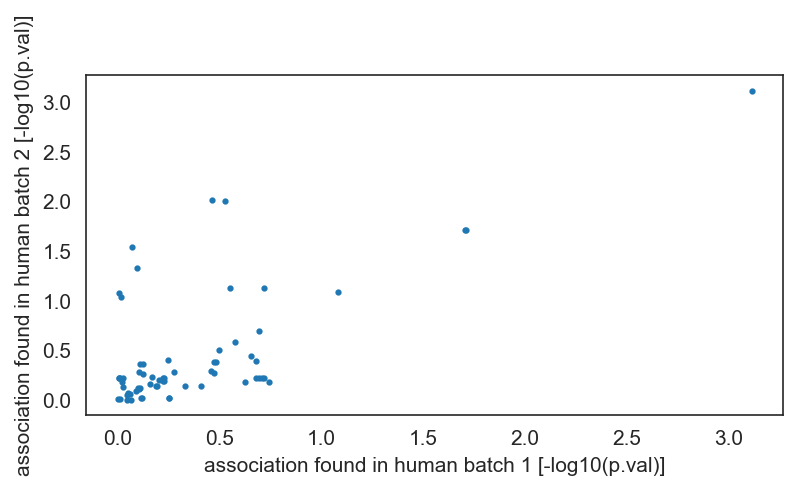

In [210]:
plt.scatter(v1, v2, s=4)
plt.xlabel('association found in human batch 1 [-log10(p.val)]')
plt.ylabel('association found in human batch 2 [-log10(p.val)]')

In [ ]:

h1.reindex(h1['k'].isin(h2['k'])

In [158]:
set(a).intersection(set(b))

{'all_annotations:BDvsCONT',
 'all_annotations:Intelligence',
 'all_annotations:Neuroticim',
 'all_annotations:frq_Neuroticism'}

In [ ]:
sig_coeff, sig_pval, max_coeff = data_by_sp['human1_10000_0.2']
